# **Desenvolvimento de uma Rede Neural Convolucional para Reconhecimento de Dígitos**





**I) Importar as bibliotecas de interesse e carregar os dados de testes e treinamento**

In [61]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math


train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

**II) Manipulação dos dados de forma a ajustá-los a rede neural**

In [62]:
y_train_data = train_data["label"]
X_train_data = (train_data.drop("label", axis = 1))/255.0
X_test_data = test_data/255.0

X_train_data = X_train_data.values.reshape(-1,28,28,1)
X_test_data = X_test_data.values.reshape(-1,28,28,1)

X_train, X_valid, y_train, y_valid = train_test_split(
X_train_data, y_train_data, test_size = 0.2)

**III) Visualização dos dados**

20


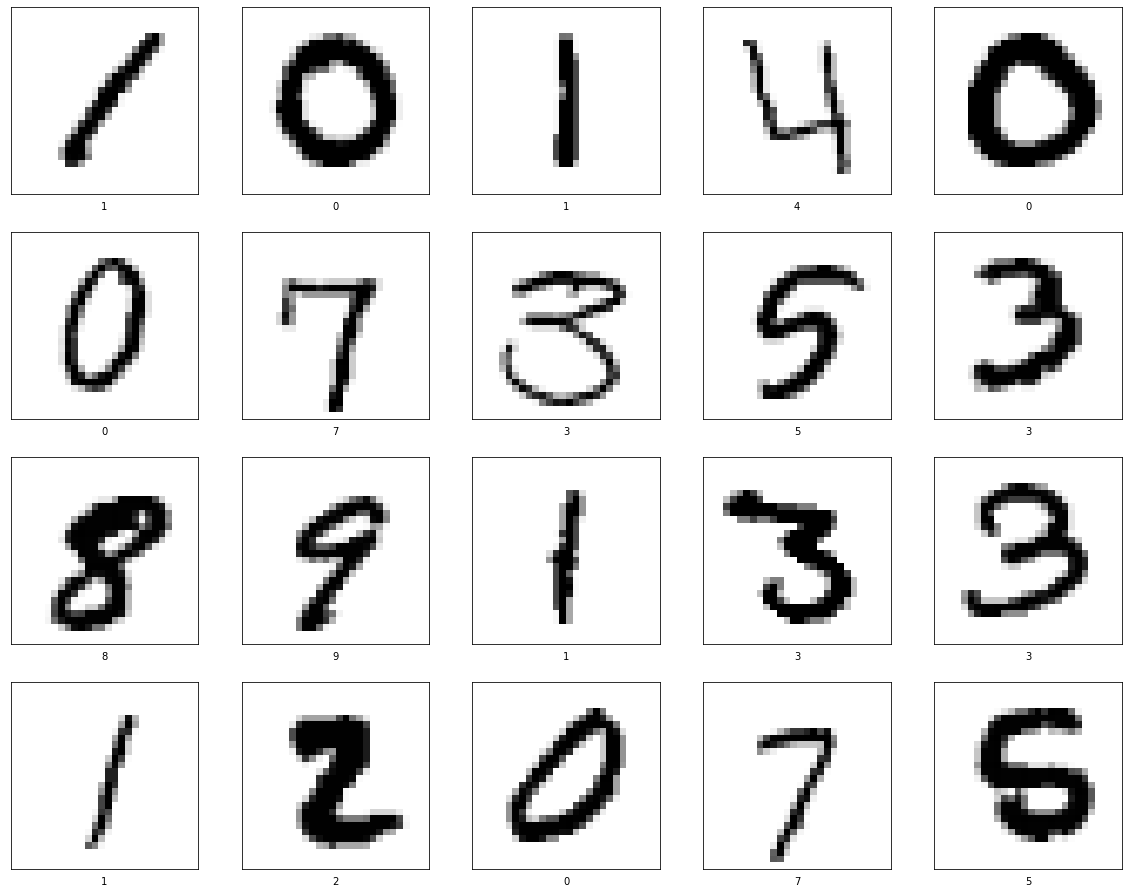

In [63]:
numbers_to_display = int(input())
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_data[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_data[i])
plt.show()

**IV) Criação do modelo de rede neural (CNN) e avaliação do desempenho para os dados de treinamento e da validação**.

Epoch 1/10
1050/1050 [==============================] - 31s 27ms/step - loss: 0.3461 - accuracy: 0.8946 - val_loss: 0.0992 - val_accuracy: 0.9707
Epoch 2/10
1050/1050 [==============================] - 28s 27ms/step - loss: 0.1357 - accuracy: 0.9592 - val_loss: 0.0699 - val_accuracy: 0.9783
Epoch 3/10
1050/1050 [==============================] - 28s 26ms/step - loss: 0.0970 - accuracy: 0.9703 - val_loss: 0.0562 - val_accuracy: 0.9815
Epoch 4/10
1050/1050 [==============================] - 27s 26ms/step - loss: 0.0784 - accuracy: 0.9756 - val_loss: 0.0497 - val_accuracy: 0.9852
Epoch 5/10
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0673 - accuracy: 0.9787 - val_loss: 0.0586 - val_accuracy: 0.9827
Epoch 6/10
1050/1050 [==============================] - 26s 25ms/step - loss: 0.0546 - accuracy: 0.9827 - val_loss: 0.0467 - val_accuracy: 0.9862
Epoch 7/10
1050/1050 [==============================] - 27s 26ms/step - loss: 0.0469 - accuracy: 0.9848 - val_loss: 0.0484 -

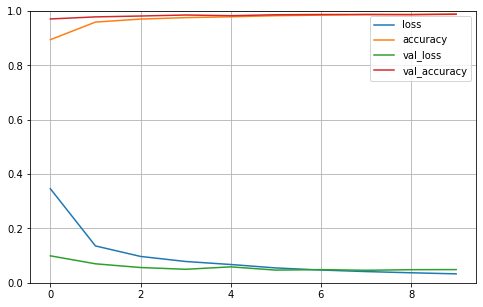

In [64]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid))
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Veja que não houve overfitting, uma vez que a curva de aprendizado mostra uma acurácia semelhante entre os dados de treinamento e validação, isso indica que o modelo está generalizando bem e não está sofrendo de overfitting. 

In [65]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
validation_loss, validation_accuracy = model.evaluate(X_valid, y_valid)

print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

263/263 [==============================] - 2s 7ms/step - loss: 0.0486 - accuracy: 0.9879
Train loss:  0.006132235284894705
Train accuracy:  0.9981845021247864
Validation loss:  0.04861094057559967
Validation accuracy:  0.9878571629524231


Veja que, com uma Validation accuracy próxima de 99%, podemos usar o modelo para prever os valores para o conjunto de teste.

Agora, fez-se a análise do modelo para o conjunto de validação, observando as predições obtidas e calculando outras métricas de interesse:

In [66]:
modelo_reconhecimento = 'digits_recognition_cnn.h5'
model.save(modelo_reconhecimento, save_format='h5')
modelo = tf.keras.models.load_model(modelo_reconhecimento)
predictions = modelo.predict(X_valid)

263/263 [==============================] - 2s 7ms/step


Veja que o elemento predictions contém, para cada observação do dataframe X_valid, um conjunto de 10 probabilidades referentes a cada classe do nosso modelo. Sendo assim, calcularemos, para cada exemplo de validação, a classe referente a probabilidade máxima.

In [67]:
classe_mais_provavel = pd.DataFrame(predictions).idxmax(axis=1)
print(classe_mais_provavel)

0       6
1       4
2       6
3       6
4       9
       ..
8395    6
8396    4
8397    8
8398    6
8399    0
Length: 8400, dtype: int64


Por fim, vejamos a matriz de confusão:

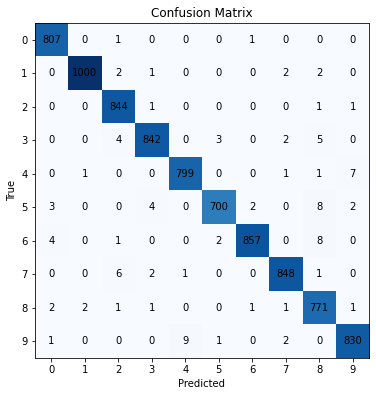

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, classe_mais_provavel)
cmap = plt.cm.Blues
plt.figure(figsize=(6,8))
plt.imshow(cm, interpolation='nearest', cmap=cmap)

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Adicionar as contagens de acertos e erros em cada célula da matriz
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')

# Exibir o plot
plt.show()

**V) Utilização do modelo nos dados de teste e arquivo CSV gerado contendo o resultado.**

In [ ]:
test_predictions = modelo.predict(X_test_data)
import io
import base64
from IPython.display import HTML
predict_class = pd.DataFrame(test_predictions).idxmax(axis=1)
ImageId = pd.Series(range(1, len(predict_class)+1))
df = pd.DataFrame({'ImageId': ImageId, 'Label': predict_class})
csv_buffer = io.StringIO()
df.to_csv(csv_buffer, index=False)

csv_buffer_encoded = base64.b64encode(csv_buffer.getvalue().encode()).decode()

HTML(f'<a href="data:text/csv;base64,{csv_buffer_encoded}" download="test_predictions.csv">Baixar CSV</a>')